In [5]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [4]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [36]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)
print(len(images))

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
64


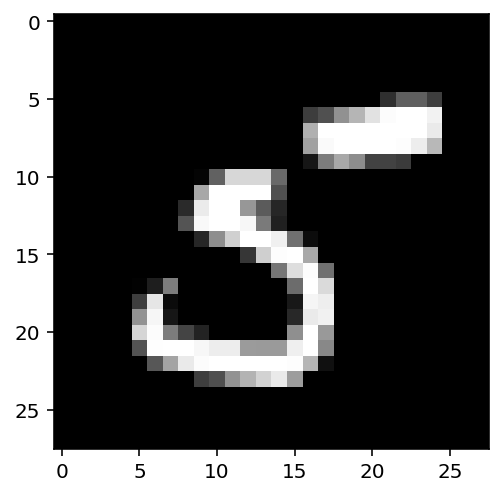

In [21]:
plt.imshow(images[2].numpy().squeeze(), cmap='Greys_r');

In [54]:
def activation(x):
    return 1/(1+torch.exp(-x))

#flatten the 2D array
inputs = images.view(images.shape[0],-1)

w1 = torch.randn(784,256)
b1 = torch.randn(1,256)
print(b1.shape)

w2 = torch.randn(256,10)
b2 = torch.randn(1,10)
out = torch.mm(activation(torch.mm(inputs,w1)+b1),w2)+b2
print(out[0][0])
torch.exp(out[0][0])

torch.Size([1, 256])
tensor(-15.9704)


tensor(1.1591e-07)

In [70]:
def softmax(x):
   # print(torch.sum(torch.exp(x),dim=1).shape)
    return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)
probability = softmax(out)
#print(probability)
print(probability.shape)
#p rint(probability.sum(dim=1))
      

torch.Size([64, 10])
